Summary Statistics for Ozone (O3) levels:
          o3_min     o3_max  o3_median  o3_variance
count  27.000000  27.000000  27.000000    27.000000
mean    5.096296  23.229630  14.025926   332.889630
std     5.659538   7.114493   5.749421   320.560837
min     0.500000  13.000000   3.200000    20.480000
25%     1.200000  15.750000   9.900000    91.240000
50%     3.200000  23.300000  13.600000   179.470000
75%     7.200000  28.100000  17.600000   524.970000
max    24.800000  39.200000  27.200000  1202.320000

Summary Statistics for PM2.5 levels:
        pm25_min   pm25_max  pm25_median  pm25_variance
count  29.000000   29.00000    29.000000      29.000000
mean    9.758621  104.00000    31.482759    9117.833793
std    14.446095  120.16774    19.424985   30735.041525
min     1.000000   39.00000    13.000000     403.660000
25%     3.000000   54.00000    21.000000     797.430000
50%     5.000000   65.00000    25.000000    1582.380000
75%    12.000000   98.00000    38.000000    3094.200000
max 

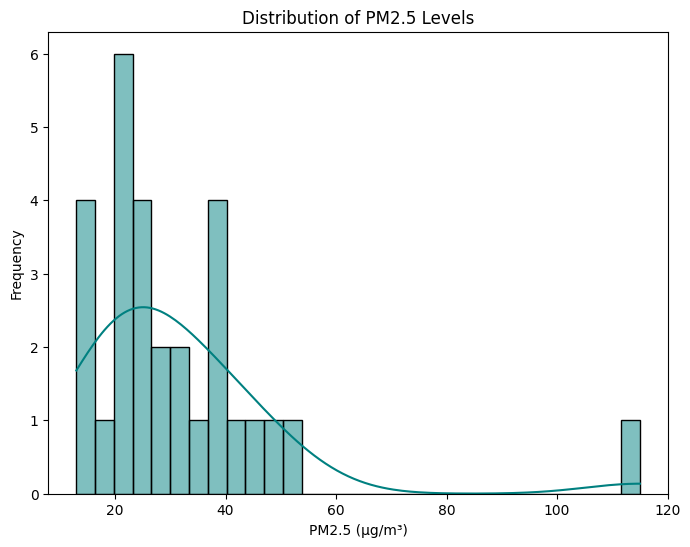

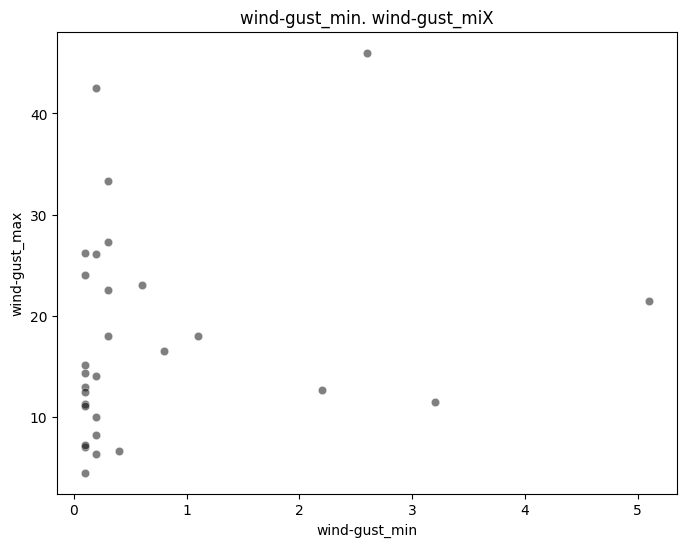

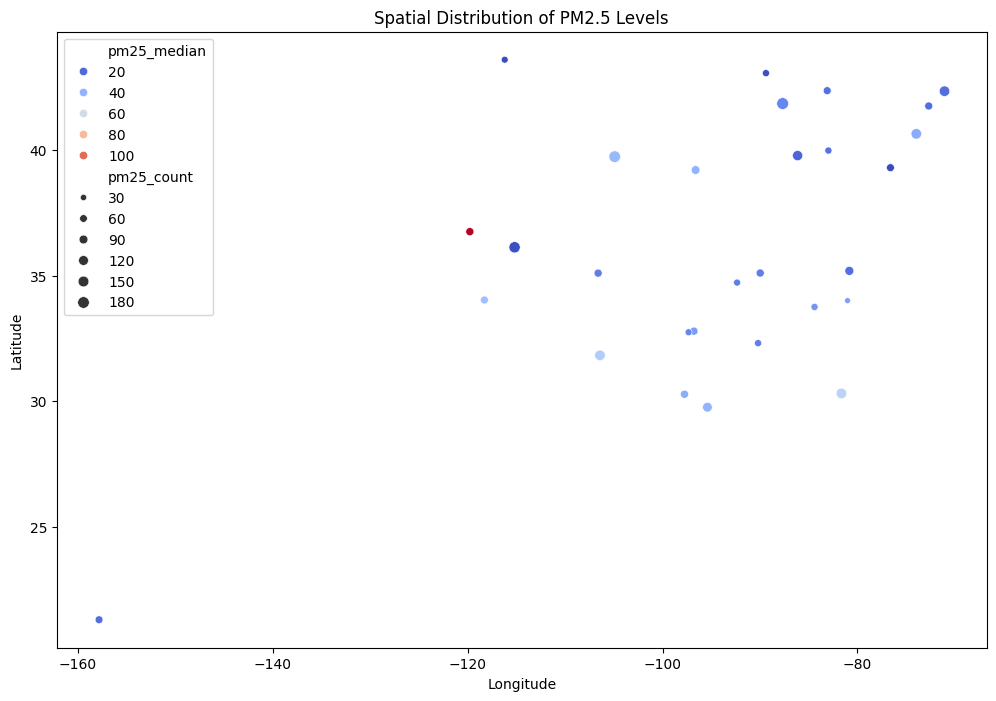

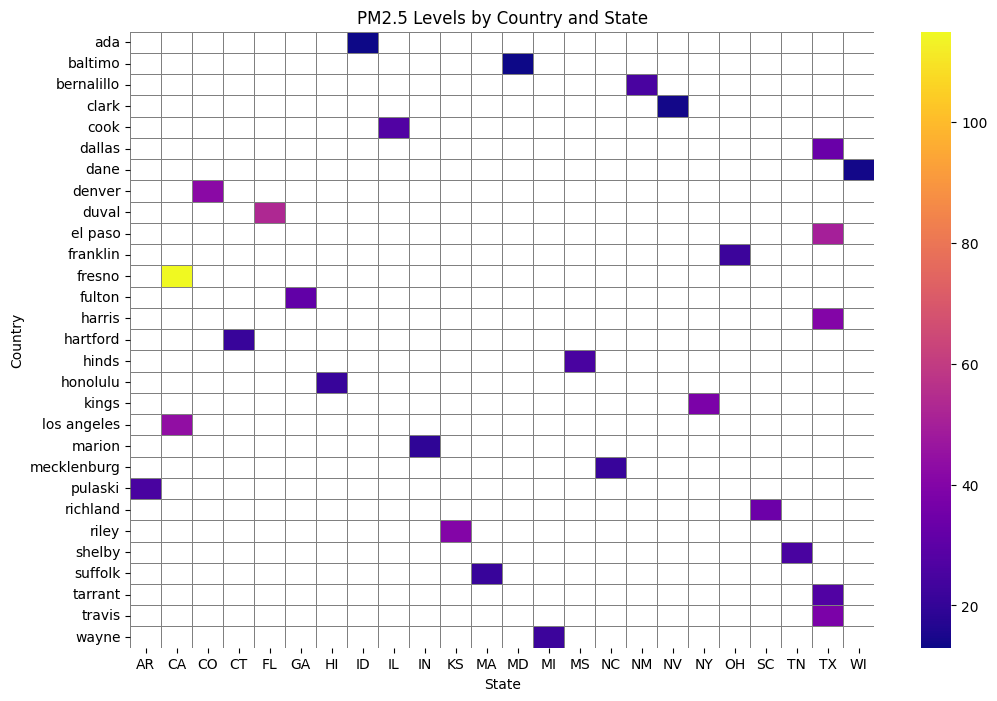

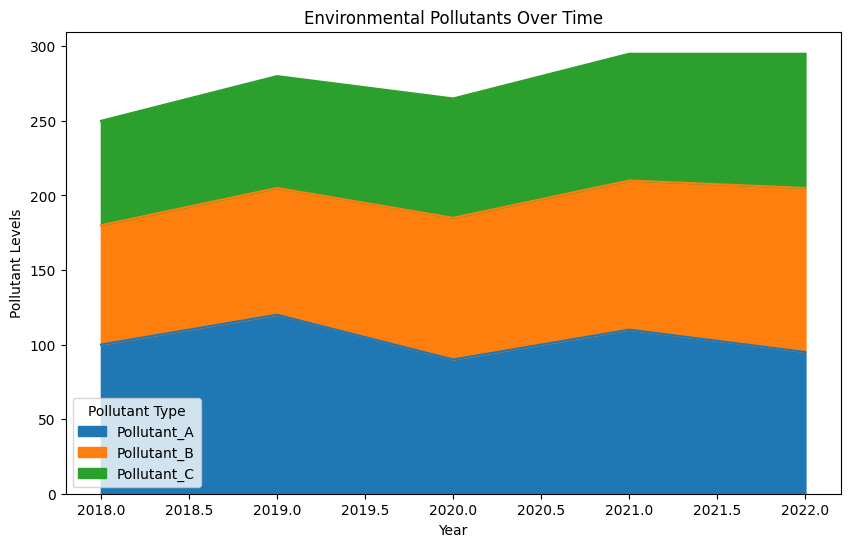

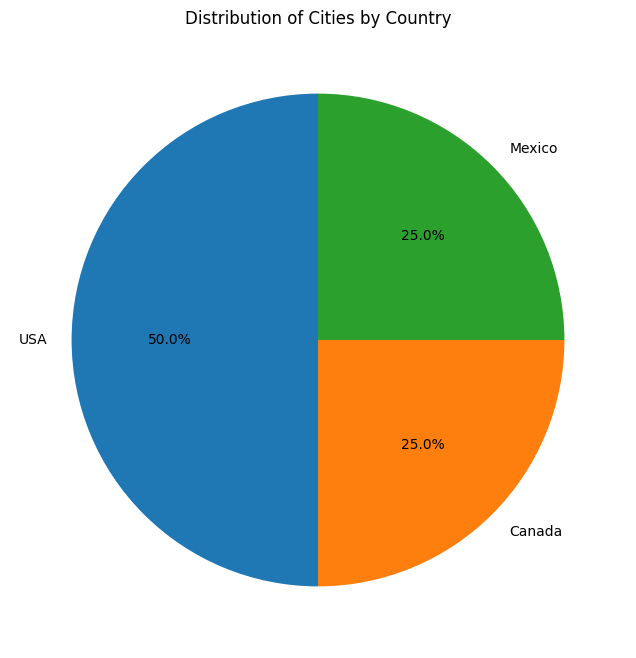

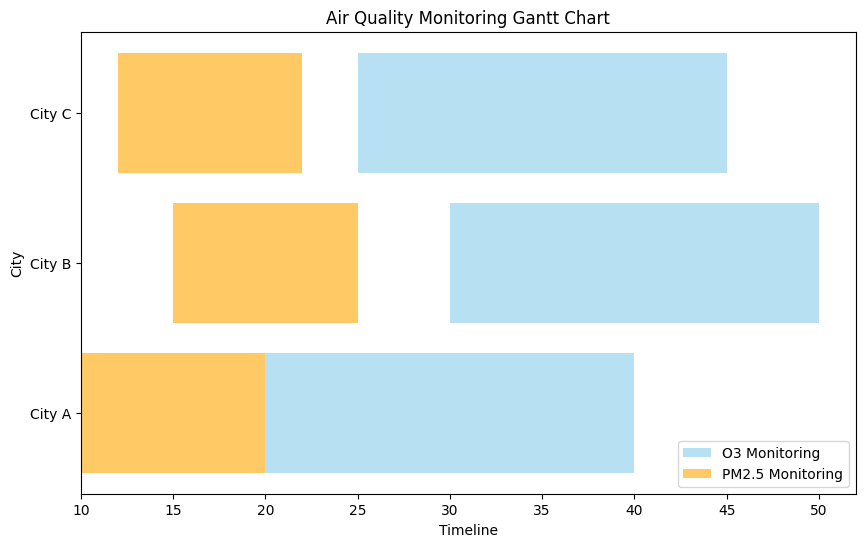

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium

# Load your dataset (assuming it's in a CSV format)
data = pd.read_csv('D:/Dataset/PR.csv')

# Summary statistics for ozone (O3) and PM2.5 levels
o3_stats = data[['o3_min', 'o3_max', 'o3_median', 'o3_variance']].describe()
pm25_stats = data[['pm25_min', 'pm25_max', 'pm25_median', 'pm25_variance']].describe()


print("Summary Statistics for Ozone (O3) levels:")
print(o3_stats)

print("\nSummary Statistics for PM2.5 levels:")
print(pm25_stats)

# Histogram of PM2.5 levels
plt.figure(figsize=(8, 6))
sns.histplot(data['pm25_median'], bins=30, kde=True, color='teal')
plt.title('Distribution of PM2.5 Levels')
plt.xlabel('PM2.5 (µg/m³)')
plt.ylabel('Frequency')
plt.show()

# Scatter plot of wind-gust_min. wind-gust_miX
plt.figure(figsize=(8, 6))
sns.scatterplot(x='wind-gust_min', y='wind-gust_max', data=data, alpha=0.5,color='black')
plt.title('wind-gust_min. wind-gust_miX')
plt.xlabel('wind-gust_min')
plt.ylabel('wind-gust_max')
plt.show()

# Geospatial mapping of PM2.5 levels
plt.figure(figsize=(12, 8))
sns.scatterplot(x='longitude', y='latitude', hue='pm25_median', size='pm25_count', data=data, palette='coolwarm')
plt.title('Spatial Distribution of PM2.5 Levels')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


# Create heatmap of PM2.5 levels by country and state

heatmap_data = data.pivot_table(index='Country', columns='State', values='pm25_median')
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='plasma', linewidths=0.5, linecolor='gray')
plt.title('PM2.5 Levels by Country and State')
plt.xlabel('State')
plt.ylabel('Country'n)
plt.show()

#Create Area chart of Pollution based on years
data = {
    'Year': [2018, 2019, 2020, 2021, 2022],
    'Pollutant_A': [100, 120, 90, 110, 95],
    'Pollutant_B': [80, 85, 95, 100, 110],
    'Pollutant_C': [70, 75, 80, 85, 90]
}
df = pd.DataFrame(data)

# Set the 'Year' column as the index (assuming 'Year' is your x-axis variable)
df.set_index('Year', inplace=True)

# Plotting area chart for selected columns
plt.figure(figsize=(10, 6))

# Plot area chart for multiple columns (stacked)
df.plot.area(ax=plt.gca())  # Using the current axis

# Customize the plot
plt.title('Environmental Pollutants Over Time')
plt.xlabel('Year')
plt.ylabel('Pollutant Levels')
plt.legend(title='Pollutant Type')

# Show the plot
plt.show()

#pie chart using city ,country, population
# Sample DataFrame (replace with your actual DataFrame)
data = {
    'City': ['City A', 'City B', 'City C', 'City D'],
    'Country': ['USA', 'Canada', 'USA', 'Mexico'],
    'Population': [100000, 80000, 120000, 90000]
}
df = pd.DataFrame(data)

# Extracting data for the pie chart
country_counts = df['Country'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 8))  # Set the figure size (width, height)

# Plot the pie chart with country counts
plt.pie(country_counts, labels=country_counts.index, autopct='%1.1f%%', startangle=90)

plt.title('Distribution of Cities by Country')  # Set the title of the pie chart

# Display the pie chart
plt.show()


#Gantt Chart using Various columns
data = {
    'City': ['City A', 'City B', 'City C'],
    'o3_min': [20, 30, 25],
    'o3_max': [40, 50, 45],
    'pm25_min': [10, 15, 12],
    'pm25_max': [20, 25, 22]
}
df = pd.DataFrame(data)

# Extract data for Gantt chart
cities = df['City']
o3_min = df['o3_min']
o3_max = df['o3_max']
pm25_min = df['pm25_min']
pm25_max = df['pm25_max']

# Calculate durations (assuming fixed start time for simplicity)
start_date = pd.Timestamp.now()  # Start date (current timestamp)

# Plotting the Gantt chart
plt.figure(figsize=(10, 6))

# Plotting the O3 monitoring intervals
plt.barh(cities, o3_max - o3_min, left=o3_min, color='skyblue', alpha=0.6, label='O3 Monitoring')

# Plotting the PM2.5 monitoring intervals
plt.barh(cities, pm25_max - pm25_min, left=pm25_min, color='orange', alpha=0.6, label='PM2.5 Monitoring')

# Customize the plot
plt.xlabel('Timeline')
plt.ylabel('City')
plt.title('Air Quality Monitoring Gantt Chart')
plt.legend()

# Display the Gantt chart
plt.show()

#using follium to create a map
#using custome tile url to create map

custom_tiles_url = 'https://url-to-your-custom-tiles/{z}/{x}/{y}.png'

# Create a folium map centered at a location and with an initial zoom level
m = folium.Map(location=[30.28333333,-97.75064103], zoom_start=10)

# Add custom tile layer to the map
folium.TileLayer(custom_tiles_url, attr='Your Attribution Text').add_to(m)

m.save('custom_map.html')
print(m)
